#Amazon Review Helpful Classification task


##Description:Product Reviews

The goal in this project is to train a binary classifier to identify helpful product reviews.

Submissions for this project will be shown on the Reviews Leaderboard.

Training Data

The primary files contains information about products and the reviews. The label column denotes whether a review was considered helpful or not.
```
product_id 	product_parent 	product_title 	vine 	verified_purchase 	review_headline 	review_body 	review_date 	marketplace_id 	product_category_id 	label
```


Additional files contain information about product categories and marketplaces.
```
category.json
category_id 	name

marketplace.json
marketplace_id 	name
Validation & Test Data
```
We provide validation and test data as input for the submissions. This data has the same format as the training data, but does not contain the corresponding label.
```
validation_hidden.csv test_hidden.csv
product_id 	product_parent 	product_title 	vine 	verified_purchase 	review_headline 	review_body 	review_date 	marketplace_id 	product_category_id
```

# Setup

In [ ]:
#import
import pandas as pd
import numpy as np
import os

In [ ]:
#download the data
!git clone https://github.com/schelterlabs/big-data-course-2022-projects.git
core_dir="/content/big-data-course-2022-projects/reviews"

Cloning into 'big-data-course-2022-projects'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 127 (delta 37), reused 49 (delta 5), pack-reused 0
Receiving objects: 100% (127/127), 5.88 MiB | 13.40 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [ ]:
#look at all review related files
os.listdir(core_dir)

['README.md',
 'marketplace.json',
 'category.json',
 'train-6.csv',
 'test_hidden.csv',
 'train-3.csv',
 'validation_hidden.csv',
 'train-7.csv',
 'train-1.csv',
 'train-5.csv',
 'train-8.csv',
 'train-4.csv',
 'train-2.csv']

In [ ]:
#Read in training files as one Pandas DataFrame
df_train=pd.concat([pd.read_csv(os.path.join(core_dir,file),delimiter=",",index_col=[0]) for file in os.listdir(core_dir) if "train" in file])
df_train["source"]="train"
#
df_val=pd.concat([pd.read_csv(os.path.join(core_dir,file),delimiter=",",index_col=[0]) for file in os.listdir(core_dir) if "val" in file])
df_val["source"]="val"
#
df_test=pd.concat([pd.read_csv(os.path.join(core_dir,file),delimiter=",",index_col=[0]) for file in os.listdir(core_dir) if "test" in file])
df_test["source"]="test"

In [ ]:
#put all into one df
print(df_train.shape[0])
df_train=pd.concat([df_train,df_val,df_test])
print(df_train.shape[0]-df_val.shape[0]-df_test.shape[0])

9614
9614


In [ ]:
df_train.tail()

,product_id,product_parent,product_title,vine,verified_purchase,review_headline,review_body,review_date,marketplace_id,product_category_id,label,source
11972,B005KIQ32Q,735550291,Lego Technic 9397 - Holztransporter,N,Y,Súpér Téil,Hat sehr großes Spass gemacht es zusammenzubau...,2013-09-24,0,2,NaN,test
11981,B0058DDVXW,892767727,Jurassic Park Trilogy [DVD],N,Y,t rex ripper,my son wanted this as he liked the 1st one so ...,2013-06-24,1,3,NaN,test
11990,B00FAXJHCY,803172158,The Martian,N,Y,A phenomenon,Rightfully joins the pantheon of all time grea...,2015-08-17,1,4,NaN,test
11996,B00PIN4PVE,989426021,Paddington [DVD] [2015],N,Y,Five Stars,very funny,2015-05-17,1,3,NaN,test
11997,B0000C88L7,484638351,The Shawshank Redemption [DVD] [1995],N,Y,Five Stars,Class,2015-05-26,1,3,NaN,test


# Data Exploration

In [ ]:
#turn date column to datetime
df_train["review_date"]=pd.to_datetime(df_train["review_date"], format='%Y-%m-%d')

In [ ]:
df_train["label"]=df_train["label"].astype(bool)

### Overall data info:

In [ ]:
print('Dataframe dimensions:', df_train.shape)
#____________________________________________________________
# # gives some infos on columns types and number of null values
tab_info=pd.DataFrame(df_train.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df_train.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df_train.isnull().sum()/df_train.shape[0]*100)
                          .T.rename(index={0:'null values (%)'}))
tab_info

Dataframe dimensions: (12000, 12)


,product_id,product_parent,product_title,vine,verified_purchase,review_headline,review_body,review_date,marketplace_id,product_category_id,label,source
column type,object,int64,object,object,object,object,object,datetime64[ns],int64,int64,bool,object
null values (nb),0,0,89,0,0,911,0,1,0,0,0,0
null values (%),0.0,0.0,0.741667,0.0,0.0,7.591667,0.0,0.008333,0.0,0.0,0.0,0.0


In [ ]:
print(f"Size of the training data: {df_train.shape}")
df_train.astype(str).describe(include='all')


Size of the training data: (12000, 12)


,product_id,product_parent,product_title,vine,verified_purchase,review_headline,review_body,review_date,marketplace_id,product_category_id,label,source
count,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000
unique,8553,5623,8682,2,2,9359,11872,3396,4,29,2,3
top,B00FAPF5U0,600633062,nan,N,Y,nan,Great,2015-01-02,0,3,True,train
freq,27,53,89,11976,7740,911,15,22,5000,4150,6860,9614


In [ ]:
for col in ['vine', 'verified_purchase', 'marketplace_id', 'label']:
  print(f'------------{col} count values------------')
  print(df_train[col].value_counts())

------------vine count values------------
N    11976
Y       24
Name: vine, dtype: int64
------------verified_purchase count values------------
Y    7740
N    4260
Name: verified_purchase, dtype: int64
------------marketplace_id count values------------
0    5000
1    3800
2    3000
3     200
Name: marketplace_id, dtype: int64
------------label count values------------
True     6860
False    5140
Name: label, dtype: int64


### NaN values

In [ ]:
df_train.isna().sum()

product_id               0
product_parent           0
product_title           89
vine                     0
verified_purchase        0
review_headline        911
review_body              0
review_date              1
marketplace_id           0
product_category_id      0
label                    0
source                   0
dtype: int64

# Data Cleaning

### TODO on data cleaning: 
- Drop rows with NAN in `review_date` **DONE**
- Deal with inconsistent product data **DONE**
- Some especially long reviews **DONE**
- Handle wrong language detection (manually?) **DONE**
-Remove outliers on numeric values (only `review_length`?) **DONE**
-Remove breakline characters from text **DONE**
-Turn `review_headline` into binary present/not present **DONE**
- replace swapped characters
- parse html tags and arkers back to formatted unicode text
- replace `product_title` with length less than 4 or NaNs with "Unknown" **DONE**


### Clean product_title
- replace `product_title` with length less than 4 or NaNs with "Unknown" **DONE**

In [ ]:
df_train['product_title'] = df_train['product_title'].apply(
    lambda x: 'unknown' if len(str(x)) < 4 or pd.isna(x) else x
)

### Consistency in product data

Check for consistency in the data. Records with the same `product_id` should have the same product information: `product_parent`, `product_title`, `product_category_id`

In [ ]:
df_train_product = df_train[["product_id", "product_parent", "product_title", "product_category_id"]]\
                  .sort_values(by="product_id", axis=0)

unique_product_id = df_train_product['product_id'].unique().shape[0]
unique_rows = df_train_product.drop_duplicates().shape[0]

print(f"Number of unique product_id: {unique_product_id}")
print(f"Number of unique rows: {unique_rows}")

if unique_product_id != unique_rows:
  print("--> Inconsistent product data")

# Have a look at the records with the same product_id
df_train_product[df_train_product['product_id'].duplicated(keep=False)]

In [ ]:
# ************** Clean product data **************
product_features = ["product_parent", 
                     "product_title", 
                     "product_category_id"]
df_train_product = df_train[["product_id"] + product_features].set_index("product_id")
product_id_set = set(df_train_product.index)
for product_id in product_id_set:
    product_df = df_train_product.loc[[product_id]]
    if product_df.shape[0] == 1:
        # Skip, since this ID only apprear once, we cannot infer its values from other rows
        continue
    else:
        if product_df.drop_duplicates().shape[0] == product_df.shape[0]:
            # Product rows already identical, skip
            continue
        else:
            for feature in product_features:
                most_frequent_value = product_df[feature].mode(dropna=True).values[0]
                df_train.loc[
                    df_train['product_id'] == product_id, feature
                ] = most_frequent_value
# ************** End clean product data **************


### Clean review text

In [ ]:
# Remove line breaks, count their number
df_train["line_breaks"] = df_train['review_body'].str.count('<br />')
df_train['review_body'] = df_train['review_body'].str.replace('<br />','')

In [ ]:
import html

In [ ]:
#replace false characters
mismatch={
    "ớ":"o",
    "ú":"u",
    "é":"e", 
    "á":"a"}
df_train["review_body"].replace(mismatch, regex=True,inplace=True)

In [ ]:
#Replace weird characters, fix html formating 

df_train["review_body"]=df_train["review_body"].apply(lambda x: html.unescape(x))


### turn `vine` and `verified_purchase` into Bool for classifier

In [ ]:
df_train[['vine','verified_purchase']]= df_train[['vine','verified_purchase']].replace({"Y": True,"N":False})


### make categories marketplace categorical

In [ ]:
df_train[["marketplace_id","product_category_id"]]=df_train[["marketplace_id","product_category_id"]].astype("category")

###Turn `review_headline` into binary present/not present

In [ ]:
# Turn `review_headline` into binary present/not present
df_train['review_headline'] = df_train['review_headline'].apply(
    lambda headline: 0 if pd.isna(headline) else 1
    )


### Clean NaNs

In [ ]:

# Drop all rows with NaNs (which is few, 65 NaN product_title and 1 NaN review_date)
#df_train.dropna(axis=0, how='any', inplace=True)

#UPDATE: Drop Na only in train set
to_drop=df_train[(df_train["source"]=="train") & (df_train.isna().any(axis=1)==True)].index
df_train.drop(to_drop, axis=0,inplace=True)
assert df_train[df_train["source"]=="val"].shape[0]==df_val.shape[0]
assert df_train[df_train["source"]=="test"].shape[0]==df_test.shape[0]

# Feature Engineering



### Time related features


In [ ]:
df_train["year"]=pd.DatetimeIndex(df_train["review_date"]).year
df_train["quarter"]=pd.DatetimeIndex(df_train["review_date"]).quarter
df_train["weekday"]=pd.DatetimeIndex(df_train["review_date"]).weekday

### Review text

Include `review_length` to the dataframe

In [ ]:
df_train["review_length"] = df_train['review_body'].apply(lambda text: len(text.split()))
stat_length = df_train["review_length"].describe(percentiles=[0.01, .25, .5, .75, 0.99])
print(stat_length)

longest_1percent_threshold = stat_length['99%']
# Remove the 1% of too long reviews
#df_train = df_train[df_train["review_length"] < longest_1percent_threshold]

count    11284.000000
mean        87.043690
std        143.574287
min          1.000000
1%           1.000000
25%         22.000000
50%         38.000000
75%         90.000000
99%        714.340000
max       2443.000000
Name: review_length, dtype: float64


Try using language detection. Include a `review_lang` column to the dataframe

### Review Language

In [ ]:
!pip install langdetect

from langdetect import detect

# *********** Add language feature column ***********
def detect_catch_exception(text):
  try:
    return detect(text)
  except:
    return 'Unknown'

df_train["review_lang"] = df_train['review_body'].apply(lambda text: detect_catch_exception(text))

# Set Languages that are not top 4 to Unknown 
top_4_lang = df_train["review_lang"].value_counts().iloc[:3].index

df_train["review_lang"] = df_train['review_lang'].apply(
    lambda lang: lang if lang in top_4_lang else 'Unknown'
)
# *********** End add language feature column ***********


     |████████████████████████████████| 981 kB 5.0 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=9ae78f5a03e19013390966e3c5a75a0ac87a4d2065f58eeac684d1dfefed27f7
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


Look at some rare language example

In [ ]:
df_train[df_train["review_lang"] == 'Unknown']['review_body']

56                       Excellent
545                      excellent
605                      brilliant
705                  great present
1244                     Excellent
                   ...            
10626                   Never kept
10636                          O.K
11267                         Epic
11854    Absolutely amazing album!
11996                   very funny
Name: review_body, Length: 302, dtype: object

In [ ]:
df_train["review_lang"]=df_train["review_lang"].astype("category")

In [ ]:
assert df_train[df_train["source"]=="val"].shape[0]==df_val.shape[0]
assert df_train[df_train["source"]=="test"].shape[0]==df_test.shape[0]

--> Language detection fails for short sentences. 

### Spelling/Grammar Feature Engineering

Try to get a ratio of misspelled word as a feature 


In [ ]:
#count spelling mistakes
!pip install language-tool-python

import language_tool_python

In [ ]:
spell_checkers={}

for lang in df_train["review_lang"].value_counts().iloc[:3].index:
  spell_checkers[lang]=language_tool_python.LanguageTool(lang)



In [ ]:
def give_spelling_mistakes(lang,text):
  try:
      misspelled=spell_checkers[lang].check(text)
  except:
    return []
  return misspelled

In [ ]:
test_row=df_train.iloc[2]

len(give_spelling_mistakes(test_row["review_lang"],test_row["review_body"]))

2

In [ ]:
#go through every cell and count grammar errors
df_train["errors"] = df_train.apply(lambda x: len(give_spelling_mistakes( x["review_lang"], x["review_body"])),axis=1)

## Sentiment analysis:

In [ ]:
#we need to clean the text first
df_train["review_body"].str.split(expand=True).stack().value_counts()[:10]

the    15536
de     13356
und    11098
a       9805
die     9379
and     9309
in      8472
der     8155
et      7901
to      7806
dtype: int64

Steps:

*   Downloading the dataframe,
*   getting rid of the accents (like é),
*   using a combination of actual Google Translate and a version of it in Python,
*   we create a sentiment column using the module "flair".

In [ ]:
# Downloading the dataframe without accents

'''
!pip install unidecode
import unidecode

df_unaccented = df_train['review_body'].apply(lambda x: unidecode.unidecode(x))
pd.DataFrame(df_unaccented).to_csv('reviews.csv')
'''

# Only using English since we decided to use Google Translate

'''
# English
!pip install flair
from flair.models import TextClassifier
from flair.data import Sentence

df_train['english'] = np.nan # create english translation column
df_train['sentiment'] = np.nan # create sentiment column

sia = TextClassifier.load('en-sentiment')
'''

# Google Translate

'''
!pip install googletrans==4.0.0-rc1
from googletrans import Translator
translator = Translator()
'''

'\n!pip install googletrans==4.0.0-rc1\nfrom googletrans import Translator\ntranslator = Translator()\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# First upload the document to Google Translate since some documents are too
# long to be able to be translated, then for the resulting document run below.
# reviews cannot be translated in the first try sometimes, hence try-except

'''
dfr = pd.read_csv('reviews1 (1).csv', index_col=0)
dfr["review_lang"] = dfr['review_body'].apply(lambda text: detect_catch_exception(text))

dfr['english'] = np.nan

while len(dfr[(dfr.review_lang!='en') & (dfr.english.isna())]) > 0:
    for i in tqdm(dfr[(dfr.review_lang!='en') & (dfr.english.isna())].index):
        try:
            dfr.loc[i, 'english'] = translator.translate(dfr.loc[i, 'review_body']).text
        except:
            None

for i in tqdm(dfr[dfr.review_lang!='en'].index):
    dfr.loc[i, 'review_body'] = dfr.loc[i, 'english']

dfr1 = dfr[['review_body']]
dfr1
'''

# the original file was too big to upload to Google Translate, so we have 2

'''
dfr = pd.read_csv('reviews2 (1).csv', index_col=0)
dfr["review_lang"] = dfr['review_body'].apply(lambda text: detect_catch_exception(text))

dfr['english'] = np.nan

# there is a link at index 8081 which messes up the results so we have 1 instead of 0
while len(dfr[(dfr.review_lang!='en') & (dfr.english.isna())]) > 1:
    for i in tqdm(dfr[(dfr.review_lang!='en') & (dfr.english.isna())].index):
        try:
            dfr.loc[i, 'english'] = translator.translate(dfr.loc[i, 'review_body']).text
        except:
            None


for i in tqdm(dfr[dfr.review_lang!='en'].index):
    dfr.loc[i, 'review_body'] = dfr.loc[i, 'english']

dfr2 = dfr[['review_body']]
dfr2
'''

# concatenate the two dataframes into one dataframe df_english

'''
pd.concat([dfr1, dfr2]).to_csv('english.csv')
df_english = pd.read_csv('english.csv', index_col=0)
df_english
'''

df_english = pd.read_csv('/content/drive/MyDrive/UVA - BigData - Group 6/english.csv', index_col=0)
df_english = df_english[df_english.isna().any(axis=1)==False] # get rid of nans
df_english

In [ ]:
# find all the sentiment values for the remaining reviews and assign them to 
# the sentiment column

'''
enggg = list(df_english.review_body)
engg = [Sentence(rev) for rev in enggg]
sia.predict(engg)
eng = [float(str(x.labels[0]).split()[1][1:-1])*{'NEGATIVE': -1, 'POSITIVE': 1}[str(x.labels[0])[:8]] for x in engg]

df_english.loc[:, 'sentiment'] = eng
'''
df_sentiment = pd.read_csv('/content/drive/MyDrive/UVA - BigData - Group 6/sentiment.csv', index_col=0)
df_sentiment

In [ ]:
df_train = df_train.join(df_sentiment)
df_train.to_csv('df_train_sentiment')
df_train

In [ ]:
df_train.to_csv('df_train_final.csv')

# Visualizations (for Poster)




Wordcloud of useful and non-useful reviews

Text(0.5, 1.0, 'Non-useful')

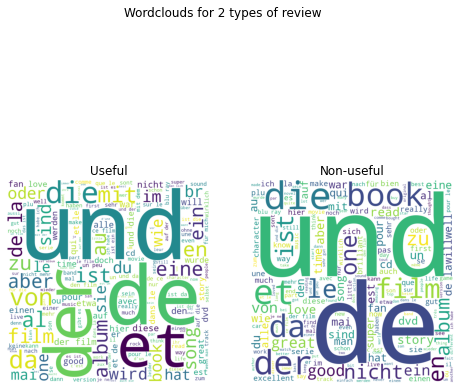

In [ ]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS


words_useful = ''
words_non_useful = ''

stopwords = set(STOPWORDS)

useful_review = df_train[df_train['label'] == True]['review_body']
non_useful_review = df_train[df_train['label'] == False]['review_body']
 
for text in useful_review:
    tokens = text.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    words_useful += " ".join(tokens)+" "

for text in non_useful_review:
    tokens = text.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    words_non_useful += " ".join(tokens)+" "


 
wordcloud_useful = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words_useful)

wordcloud_non_useful = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words_non_useful)

fig, axs = plt.subplots(1,2, figsize=(8,8))
fig.suptitle('Wordclouds for 2 types of review')
axs[0].imshow(wordcloud_useful)
axs[0].axis("off")
axs[0].set_title("Useful")

axs[1].imshow(wordcloud_non_useful)
axs[1].axis("off")
axs[1].set_title("Non-useful")

--> mixing languages makes it unclear

Wordcloud English only

Text(0.5, 1.0, 'Non-useful')

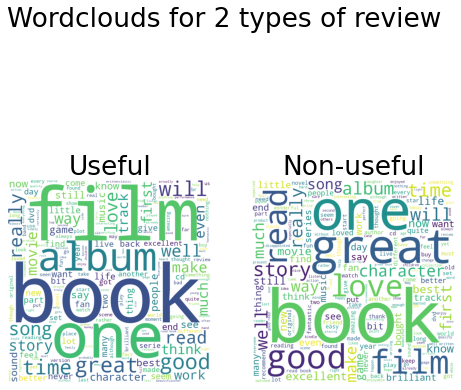

In [ ]:
from wordcloud import WordCloud, STOPWORDS


words_useful = ''
words_non_useful = ''

stopwords = set(STOPWORDS)

useful_review = df_train[(df_train['label'] == True) & (df_train['review_lang'] == 'en')]['review_body']
non_useful_review = df_train[(df_train['label'] == False) & (df_train['review_lang'] == 'en')]['review_body']
 
for text in useful_review:
    tokens = text.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    words_useful += " ".join(tokens)+" "

for text in non_useful_review:
    tokens = text.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    words_non_useful += " ".join(tokens)+" "


 
wordcloud_useful = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words_useful)

wordcloud_non_useful = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words_non_useful)

fig, axs = plt.subplots(1,2, figsize=(8,8))
fig.suptitle('Wordclouds for 2 types of review')
axs[0].imshow(wordcloud_useful)
axs[0].axis("off")
axs[0].set_title("Useful")

axs[1].imshow(wordcloud_non_useful)
axs[1].axis("off")
axs[1].set_title("Non-useful")

Distribution of review language

count     11284
unique        4
top          en
freq       4095
Name: review_lang, dtype: object


Text(0, 0.5, 'Count')

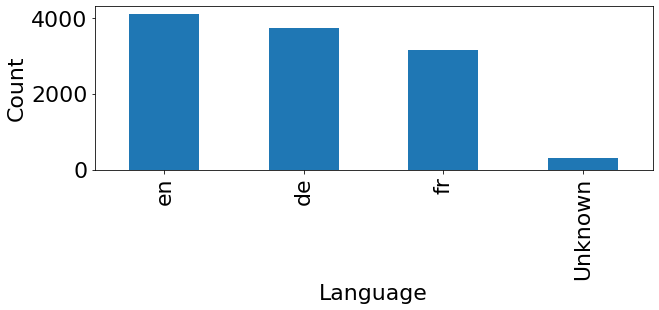

In [ ]:
print(df_train["review_lang"].describe())

df_train["review_lang"].value_counts().plot.bar(figsize=(10, 3))
plt.xlabel('Language')
plt.ylabel('Count')

- Corerelations

count    11284.000000
mean        87.043690
std        143.574287
min          1.000000
25%         22.000000
50%         38.000000
75%         90.000000
max       2443.000000
Name: review_length, dtype: float64


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


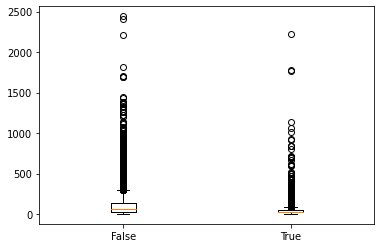

In [ ]:
import matplotlib.pyplot as plt


print(df_train["review_length"].describe())
df_train["label"].unique()
listOfUniques = df_train["label"].unique()

fig, ax = plt.subplots()
ax.boxplot([df_train[df_train['label'] == True]["review_length"],df_train[df_train['label'] == False]["review_length"]])
ax.set_xticklabels(listOfUniques)

plt.show()





There are many outliers

Y False    3856
True     3470
Name: label, dtype: int64
N True     2995
False     963
Name: label, dtype: int64


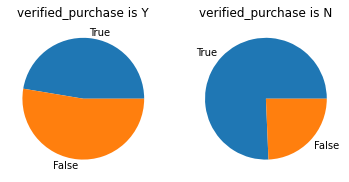

In [ ]:
target="verified_purchase"

fig, ax = plt.subplots(nrows=1,ncols=len(df_train[target].unique()))

for i, label in enumerate(df_train[target].unique()):
    values=df_train[df_train[target]==label]["label"].value_counts()
    labels=values.index
    print(label,values)
    ax[i].pie([values[True],values[False]],labels=[True,False])
    ax[i].set_title(f"{target} is {label}")
    

plt.rcParams.update({'font.size': 22})

plt.show()
#Unexpected result, double check 

1 False    2104
True     1695
Name: label, dtype: int64
0 True     3049
False    1763
Name: label, dtype: int64
2 True     1591
False     882
Name: label, dtype: int64
3 True     130
False     70
Name: label, dtype: int64


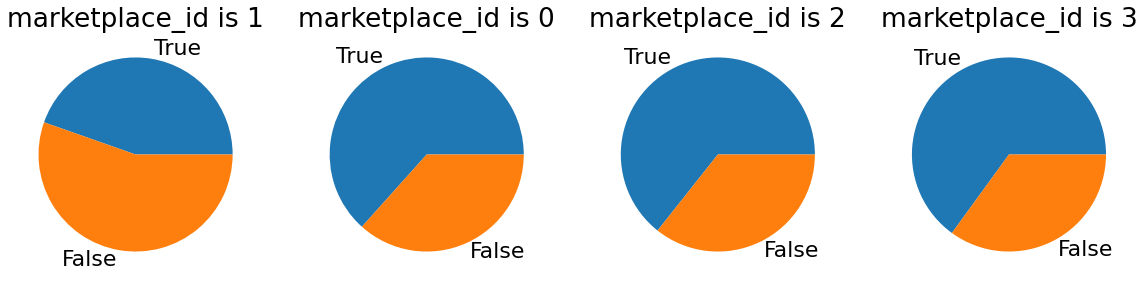

In [ ]:
target="marketplace_id"

fig, ax = plt.subplots(nrows=1,ncols=len(df_train[target].unique()), figsize=(20,10))

for i, label in enumerate(df_train[target].unique()):
    values=df_train[df_train[target]==label]["label"].value_counts()
    labels=values.index
    print(label,values)
    ax[i].pie([values[True],values[False]],labels=[True,False])
    ax[i].set_title(f"{target} is {label}")
    


plt.show()

en False    2198
True     1897
Name: label, dtype: int64
de True     2430
False    1310
Name: label, dtype: int64
Unknown False    233
True      69
Name: label, dtype: int64
fr True     2069
False    1078
Name: label, dtype: int64


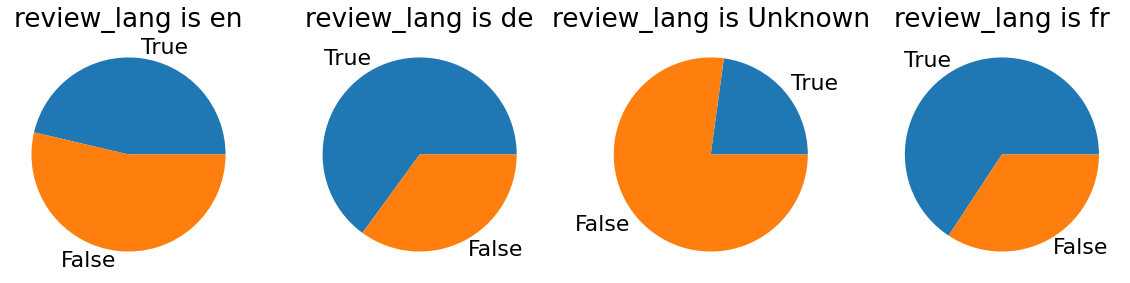

In [ ]:
target="review_lang"

fig, ax = plt.subplots(nrows=1,ncols=len(df_train[target].unique()), figsize=(20,10))

for i, label in enumerate(df_train[target].unique()):
    values=df_train[df_train[target]==label]["label"].value_counts()
    labels=values.index
    print(label,values)
    ax[i].pie([values[True],values[False]],labels=[True,False])
    ax[i].set_title(f"{target} is {label}")
    


plt.show()

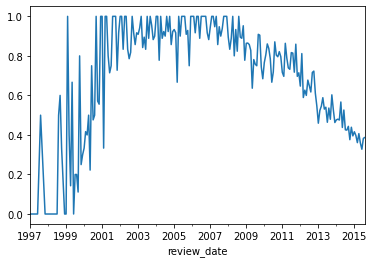

In [ ]:
#plot ratio of herlpful to unhelpful reviews over months
monthly_helpful_review=df_train.groupby(df_train["review_date"].dt.to_period('M'))["label"].sum()

monthly_total_review=df_train.groupby(df_train["review_date"].dt.to_period('M'))["label"].count()

ratio=monthly_helpful_review/monthly_total_review

ratio.plot()

# Saving Results



In [ ]:
df_train.head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df_train.to_csv("/content/drive/MyDrive/UVA - BigData - Group 6/submissions/19.03/df_processed.csv")

In [ ]:
df_train=pd.read_csv("/content/drive/MyDrive/UVA - BigData - Group 6/submissions/19.03/df_processed.csv",
                     index_col="Unnamed: 0",
                     dtype={"review_headline": "bool",
                            "marketplace_id": "category",
                            "product_category_id": "category",
                            "review_lang": "category"}
                     )

In [ ]:
df_train["year"]=pd.DatetimeIndex(df_train["review_date"]).year
df_train["quarter"]=pd.DatetimeIndex(df_train["review_date"]).quarter
df_train["weekday"]=pd.DatetimeIndex(df_train["review_date"]).weekday

# Classification

-baseline: Linear regression

-Deep Neural Network 

-XGBoost (Gradient Boost)

-Random Forest

-Ensemble 



In [ ]:
#spark = SparkSession.builder\
#.       .config("spark.driver.memory","6g")\
#.       .get()rCreate()

### Setup

Decide what data we will be using from here on out 


In [ ]:


input_cols=["verified_purchase","review_headline","review_length","line_breaks","year","quarter","weekday","errors","sentiment"]
categorical_cols=["marketplace_id","review_lang"]
label=["label"]

In [ ]:
df_train.dtypes

In [ ]:
df_train.head()



### Linear regression


This is a reasonable baseline value, should be slightly better than random

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

In [ ]:


x_train=df_train[df_train["source"]=="train"][input_cols]
y_train=df_train[df_train["source"]=="train"][label]

x_val=df_train[df_train["source"]=="val"][input_cols]

x_test=df_train[df_train["source"]=="test"][input_cols]



In [ ]:
#One Hot Encloding

def ohe_cols(dataframe, col_list):

  for col in col_list:
    x_col=pd.get_dummies(dataframe[col], prefix=col)
    dataframe.drop(col, axis=1, inplace= True)

    dataframe=pd.concat([dataframe,x_col],axis=1)

  return dataframe


x_train=ohe_cols(x_train,categorical_cols)

x_val=ohe_cols(x_val,categorical_cols)

x_test=ohe_cols(x_test,categorical_cols)

In [ ]:
clf = LogisticRegression(max_iter=1000).fit(x_train, y_train)

y_val=clf.predict(x_val)
y_test=clf.predict(x_test)

clf.score(x_train, y_train)

In [ ]:
#saving submissions
pd.Series(y_val).to_csv("Log_Reg_VAL.csv",index=None,header=None)
pd.Series(y_test).to_csv("Log_Reg_TEST.csv",index=None,header=None)

In [ ]:
assert df_val.shape[0]==len(y_val)
assert df_test.shape[0]==len(y_test)



### LightGBM


I have high hopes for this one, wins a lot of Kaggle competitions

In [ ]:
import lightgbm as lgb

In [ ]:
lgbm = lgb.LGBMClassifier(
       objective='binary',
       metric = 'binary_logloss')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_train[df_train["source"]=="train"][input_cols], df_train[df_train["source"]=="train"][label], test_size=0.15)

In [ ]:
lgbm.fit(x_train,y_train)

In [ ]:
accuracy_score(lgbm.predict(x_test),y_test)

In [ ]:
pd.Series(lgbm.feature_importances_, index=df_train[df_train["source"]=="train"][input_cols].columns)

### Submission

In [ ]:
lgbm.fit(df_train[df_train["source"]=="train"][input_cols],df_train[df_train["source"]=="train"][label])

In [ ]:
y_val=lgbm.predict(df_train[df_train["source"]=="val"][input_cols])
y_test=lgbm.predict(df_train[df_train["source"]=="test"][input_cols])

In [ ]:
#saving submissions
pd.Series(y_val).to_csv("LightGMB_VAL.csv",index=None,header=None)
pd.Series(y_test).to_csv("LightGMB_TEST.csv",index=None,header=None)

In [ ]:
assert df_val.shape[0]==len(y_val)
assert df_test.shape[0]==len(y_test)



### Hyperparameter tuning with Ax


